# Introduction to Pandas

Pandas is a versatile Python package for dealing with tabular data, of the kind that you as scientists are dealing with all the time.

Pandas is, broadly speaking, built on Numpy, so the stuff you've learned in the last couple of weeks is directly applicable to working with Pandas.

Pandas allows us to:

* Read in tabular data from Excel, csv, text and other sources
* Access the data using similar tools to those you've encountered with Numpy
* Join datasets together
* Generate data summaries
* plot data
* write data to file

In [ ]:
# this is the format you will often see online
import pandas as pd

# This will also work, but is more typing in the long-run:
import pandas

# This is also perfectly valid, but will get difficult quickly:
from pandas import DataFrame, Series, read_csv
df = DataFrame()

# You might see this, for pandas and other packages, please don't do it, it is bad practice.
# from pandas import *
# It imports everything from the package, and means you don't have to use any prefixes, 
# instead of pandas.DataFrame() you would just type DataFrame.
# Again, please don't do it.

3


Import Pandas and use it to read the genome array from last time

Pandas has two really useful features that distinguish it from numpy, headers and indexes. You can label columns and rows with something meaningful, instead of having to remember, or having to store them in separate objects. Using two attributes of the DataFrame `index` and `columns`. Object attributes are a little new, and you haven't dealt with them much, but remember the `shape` attribute of numpy arrays:

In [ ]:
import numpy as np
arr = np.random.randint(1, 100, size=(8,5))
print(arr.shape)
print(arr)

(8, 5)
[[51 50 81 82 64]
 [70 83  6 71 78]
 [75 96 54  3 79]
 [60 99 97 94  2]
 [20 96 15 91 33]
 [89 26 10  4 11]
 [ 1 91 23 57 52]
 [68  1 72 91 60]]


We can put this into a Pandas DataFrame by using the constructor `pd.DataFrame` (note the capitalisation)

In [ ]:
import pandas as pd
df = pd.DataFrame(arr)
print(df)

    0   1   2   3   4
0  51  50  81  82  64
1  70  83   6  71  78
2  75  96  54   3  79
3  60  99  97  94   2
4  20  96  15  91  33
5  89  26  10   4  11
6   1  91  23  57  52
7  68   1  72  91  60


You're used to methods, which are used as: `variable_name.method_name()`, object attributes are fixed values that are specific to the object, such as the `shape` of an array. <p>Attributes are accessed as: `variable_name.attribute` - notice the lack of brackets

Try to print the columns and index of the DataFrame

And these attributes can be overwritten, by assignment, treating the attribute as a variable:

In [ ]:
df.columns = ["Gene {}".format(x) for x in range(df.shape[1])]
print(df)

   Gene 0  Gene 1  Gene 2  Gene 3  Gene 4
0      51      50      81      82      64
1      70      83       6      71      78
2      75      96      54       3      79
3      60      99      97      94       2
4      20      96      15      91      33
5      89      26      10       4      11
6       1      91      23      57      52
7      68       1      72      91      60


Try to create a new index

A quick note on tab completion.

In your Spyder (Anaconda) environment, some of you may have noticed that when you type things, there's a box appearing below with suggestions. If the highlighted suggestion is what you want, you can just press the `tab` key and it will insert the thing you want.

This is one of the really useful aspects of using an IDE like Spyder. Tab completion works for variable names, object methods, and a host of other things, and can speed up your programming significantly.

Try it now, type `df.` in Spyder and press tab (it might even pop up the box automatically). If you type `df.` and then start typing the name of the thing you want, e.g. `df.co` then Spyder should offer you `df.columns`.

# Indexing with Pandas

There are three main ways to access data in a Pandas DataFrame. Firstly, indexing the column directly, in a similar way to the dictionary:

In [ ]:
df["Gene 1"]

0    50
1    83
2    96
3    99
4    96
5    26
6    91
7     1
Name: Gene 1, dtype: int64

And, like a dictionary, we can't have two columns with the same name. If you try to create a column with a name that already exists, Python will just overwrite the contents - it also won't warn you.

If we want to get multiple columns this way, we can pass a list:


In [ ]:
df[["Gene 1", "Gene 3"]]

,Gene 1,Gene 3
0,50,82
1,83,71
2,96,3
3,99,94
4,96,91
5,26,4
6,91,57
7,1,91


And the result is a DataFrame that looks very nice in a jupyter notebook.

We can also use this method to add a new column as well:

In [ ]:
df["Gene mean"] = df.mean(axis=1)
print(df)

   Gene 0  Gene 1  Gene 2  Gene 3  Gene 4  Gene mean
0      51      50      81      82      64       65.6
1      70      83       6      71      78       61.6
2      75      96      54       3      79       61.4
3      60      99      97      94       2       70.4
4      20      96      15      91      33       51.0
5      89      26      10       4      11       28.0
6       1      91      23      57      52       44.8
7      68       1      72      91      60       58.4


The other method allows us to access either by label, or by position. Imagining the original df as a numpy array, and we could use `df[row, column]` to access a particular data point. However, this would conflict with the above method, Pandas doesn't know that this is a row, column; and will look for at best two columns, either way, throwing an error.

So, we use `df.iloc[row, column]` to access a specific data value. If we have custom labels for our columns and index, we can use the alternative 
`df.loc[row_name, column_name]`

In [ ]:
print("By index position: ", df.iloc[0, 1])
print("By column/row name: ", df.loc[0, "Gene 1"])

By index position:  76
By column/row name:  76


And at all times, you can access all of the underlying data as a numpy array, using `df.to_numpy()`

In [ ]:
df.to_numpy()

array([[61, 76,  3, 10, 67],
       [90, 24, 32,  7, 38],
       [83, 55, 99,  4, 68],
       [28, 22, 16, 84, 61],
       [66, 60,  4, 80, 51],
       [34, 11, 40, 89, 41],
       [ 3, 89,  3, 46, 89],
       [10, 28, 61, 12, 93]])

Remember this exercise from class 4:

There is now an Excel file containing some data for you to open and experiment with making modifications to the data and filtering using Booleans.

In [ ]:
# Exercise 10:

# using Pandas, import the file intro_to_pandas_mice.xlsx
# Randomly modify each mouse's weight by ± 2 grams
# Randomly modify each mouse's happiness by 15 %
# print the unique IDs of all mice with happiness above 40
# print the unique ids of all male mice on drug 
# print the unique ids of all female mice not on drug 
# Create a function to calculate the average weight of the male and female mice separately.

Once you've read the Excel file (`intro_to_pandas_mice.xlsx`) in, try using the `describe` method of the DataFrame to learn a bit more about the constituent data

In [ ]:
import pandas as pd

df = pd.read_excel("./sample_data/intro_to_pandas_mice.xlsx", sheet_name="mice")
df.describe()

,weight,happiness
count,10.000000,10.000000
mean,20.287263,76.358516
std,2.306556,18.125936
min,16.093461,43.829035
25%,19.275853,64.272440
50%,20.290807,81.692564
75%,22.100664,88.919155
max,23.381724,98.241881


In [ ]:
print(df.head())

  Unnamed: 0 sex     weight  happiness treatment
0    mouse 0   M  16.093461  53.634323   no drug
1    mouse 1   F  20.383521  73.275087      drug
2    mouse 2   F  19.051272  43.829035      drug
3    mouse 3   M  19.949597  89.657870      drug
4    mouse 4   M  17.440868  77.899864      drug


In [ ]:
print(df.T)

                  0        1        2  ...        7        8        9
Unnamed: 0  mouse 0  mouse 1  mouse 2  ...  mouse 7  mouse 8  mouse 9
sex               M        F        F  ...        F        M        M
weight      16.0935  20.3835  19.0513  ...  20.1981  23.3817  21.4025
happiness   53.6343  73.2751   43.829  ...  98.2419  93.5873   86.703
treatment   no drug     drug     drug  ...     drug  no drug  no drug

[5 rows x 10 columns]


In [ ]:
# example of best practice for generating random numbers and why.
import numpy as np

# Always use a seed to ensure reproducibility
seed = 4 # whatever number you want (integer only)
# Create a random number generator (rng) which you can re-use whenever you need to generate some random numbers
rng = np.random.default_rng(seed)
random_values = rng.normal(size=(2, 2))
print("array size 2, 2", random_values)
r2 = rng.normal(size=(1, 3))
print("First call: array size 1, 3", r2)
rng = np.random.default_rng(seed)
print("array size 2, 3", rng.normal(size=(2, 3)))
print("notice now that the first item in the second row has changed, because the array is a different size")
print("Second call: array size 1, 3", rng.normal(size=(1, 3)))
print("and that the elements in this array are different from the first call")

array size 2, 2 [[-0.65179115 -0.17471729]
 [ 1.66372399  0.65914775]]
array size 1, 3 [[-1.64139729 -0.00520326 -0.62346374]]
array size 2, 3 [[-0.65179115 -0.17471729  1.66372399]
 [ 0.65914775 -1.64139729 -0.00520326]]
array size 1, 3 [[-0.62346374  0.14863152 -1.60818778]]


In [ ]:
df_dict = pd.read_excel("intro_to_pandas_mice.xlsx", sheet_name=None)
df_dict.keys()

dict_keys(['Arkusz1', 'mice', 'genetic_data'])

In [ ]:
df_dict.keys()
mouse_df = df_dict["mice"]
mouse_df.index = mouse_df["Unnamed: 0"]
mouse_df = mouse_df.drop("Unnamed: 0", axis=1)
mouse_df

,sex,weight,happiness,treatment
Unnamed: 0,,,,
mouse 0,M,16.093461,53.634323,no drug
mouse 1,F,20.383521,73.275087,drug
mouse 2,F,19.051272,43.829035,drug
mouse 3,M,19.949597,89.657870,drug
mouse 4,M,17.440868,77.899864,drug
mouse 5,F,22.638194,85.485264,drug
mouse 6,M,22.333376,61.271558,no drug
mouse 7,F,20.198092,98.241881,drug
mouse 8,M,23.381724,93.587267,no drug


Pandas gives us considerably more power to carry out complex operations on our data. One of the common tools you might see for this is the `join` method.

This allows us to join two DataFrames side-by-side. In order to achieve this, you often need to specify something to join 'on'. This is the element that Pandas will use to determine which rows of the DataFrames to join together. If you don't specify this, then Pandas will use the `index` that we looked at earlier. If you have a data column that contains some kind of unique identifier, then you can also join on that instead, just give the name of the column (although this dataset may not have a column like this):

```
mouse_data.join(genetic_data, on="column_name", how="method")
```

This method has an additional argument: `how`. This specifies the order in which they should be joined, this can have a very big difference in what comes out. Common values are: "left", "right", "inner", "outer"

The Excel file has two sheets, "mice" and "genetic_data" - read both as variables (look at the documents to learn how to specify which sheet you'd like to read in). Try joining them in different ways, and see what this does to your data.

In [ ]:
mouse_df = pd.read_excel('intro_to_pandas_mice.xlsx', sheet_name='mice', index_col=0)
gene_df = pd.read_excel('intro_to_pandas_mice.xlsx', sheet_name='genetic_data', index_col=0)
mouse_df = mouse_df.join(gene_df, how="left")
print(mouse_df)
mouse_df.join()

        sex     weight  happiness treatment  Gene 1  Gene 2  Gene 3
mouse 0   M  16.093461  53.634323   no drug    1.00     1.0    3.00
mouse 1   F  20.383521  73.275087      drug     NaN     NaN     NaN
mouse 2   F  19.051272  43.829035      drug     NaN     NaN     NaN
mouse 3   M  19.949597  89.657870      drug     NaN     NaN     NaN
mouse 4   M  17.440868  77.899864      drug    1.25     1.0    2.54
mouse 5   F  22.638194  85.485264      drug     NaN     NaN     NaN
mouse 6   M  22.333376  61.271558   no drug    1.33     2.2    1.11
mouse 7   F  20.198092  98.241881      drug     NaN     NaN     NaN
mouse 8   M  23.381724  93.587267   no drug    1.20     1.8    1.86
mouse 9   M  21.402528  86.703010   no drug     NaN     NaN     NaN


In [ ]:
mouse_na = mouse_df.isna()
mouse_df[~mouse_na]
mouse_df[mouse_na]

,sex,weight,happiness,treatment,Gene 1,Gene 2,Gene 3
mouse 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Look at the data you got after joining the two dataframes using the "left" method. Assuming, that no gene expression data in the second dataframe means you should set the value to 0 - get rid of NaN values in your resulting dataframe.

An alternative to `join`, with a bit more flexibility is `merge`. The functionality is similar, but allows you to join by columns instead.

## Plotting

Because it is often used for data science applications, Pandas also contains some built-in plotting functionality. These are implemented as methods of the DataFrame, e.g.

In [ ]:
df.scatter()

When called, it assumes the rows in your table are the elements to plot, and the columns are the categories, so for the mouse data it will plot the weight of each animal, then the sex, then the happiness, (depending on the column order) etc.

One interesting plot that I've found in Pandas, that isn't in base matplotlib that you've been using is the scatter matrix. It can be really valuable for uncovering correlations between observations, or data anomalies.

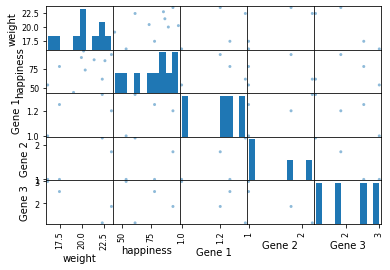

In [ ]:
pd.plotting.scatter_matrix(mouse_df);  # contained in the plotting submodule, accepts a DataFrame as the first argument.

## Saving data to file

Finally, getting data out:

There are a couple of useful ways to know about, DataFrames have a collection of methods if you type:

```
mouse_data.to_
```
and the tab completion should show you the different options, most of which should be clear. 

If you want to write to an Excel file (or write out to the source, if you imported from an Excel file), then the process is a bit more complicated, using an `ExcelWriteObject`. An example of this is provided below


In [ ]:
import os
# print(os.getcwd())
# mouse_df.to_csv("C:\\full\\path\\to\\my\\file\\my_mouse_file.csv")
# mouse_df.to_csv("./path/to/my/file/on/a/mac/my_mouse_file.csv")
mouse_df.to_excel("my_excel_file.xlsx", sheet_name="mouse_data_analysed")

/content


In [ ]:
with pd.ExcelWriter("location_to_save_file.xlsx", mode="a") as open_excel_file:  # with is a special Python keyword that is really helpful here. What it does is ensure the file gets closed when we're done.
    name_of_dataframe.to_excel(open_excel_file, sheet_name="output_data")

Note the syntax on the `with` keyword:

```
with file_opening_object as variable_name_of_opened_file:
    name_of_dataframe.to_excel(variable_name_of_opened_file, 
                               sheet_name="output_data")
```
If you don't use the with keyword, and there's an error, then the file never gets closed, and it can cause other issues. I would recommend using this any time you're explicitly using this method, or the `open` function. The `numpy` built-in, `genfromtxt` that many of you used last time deals with a lot of that for us, so doesn't need the `with` keyword syntax we're using here.


Take the file we've provided for you: "2021-01-08_mouse_phenome_db_Jackson_measurements.csv" From the Jackson Laboratory website and read it into Python as a Pandas DataFrame.

1. Print the size of the table (rows and columns)
2. Create a new table with all rows with blank data removed, and print the size of the new table.
3. How many rows in the original table have units of %?
4. Show the data where "projsym" is "Wiltshire1"
5. Show how many entries there are for anything beginning with "Wiltshire" 
6. Show how many entries there are for each "projsym" category

If we remember the moving average calculation from before Christmas:

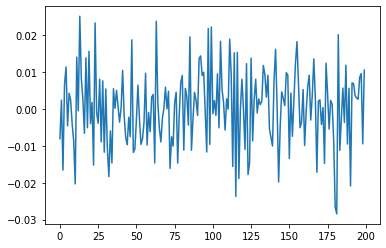

In [ ]:
# Exercise 11: Write a function that calculates a running average of a signal within a given window of 10  using for loop and if (or solving the problem of the first 5 and last 5 samples in the other way)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

random_seed = 9
random_number_generator = np.random.default_rng(random_seed)

mu, sigma = 0, 0.01 
signal = random_number_generator.normal(mu, sigma, 200) # here we generate the signal by drawing samples from normal distribution

fig, ax = plt.subplots()
ax.plot(signal); # plot of the signal

Calculation of moving averages is a very common operation in many areas of data science (for which Pandas is used a lot), so Pandas has a built in function for this: `rolling`

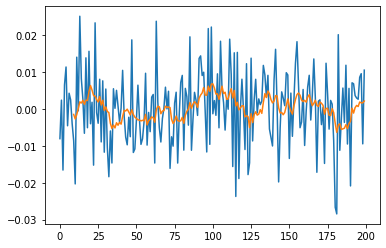

In [ ]:
signal_df = pd.DataFrame(signal)
moving_average = signal_df.rolling(window=10).mean()
fig, ax1 = plt.subplots()
ax1.plot(signal)
ax1.plot(moving_average);

## Exercise
There is a new file: intro_to_pandas_exercise.xlsx
It contains the results from 10 experiments, one per tab. Each tab contains gene expression data on 25 genes for 50 people in each. 
Using Pandas:
1. The maximum threshold for measurement is 45. Remove any subject where this threshold is exceeded for the gene quantities in each experiment
2. Print the remaining number of subjects in each experiment
3. Join the experiments together into a single `DataFrame`
4. Genes 3, 7 and 15 are housekeeping genes. Calculate the mean of these genes for each experiment.
5. Normalise the data for each experiment, by dividing by the mean of the housekeeping genes
6. Show a summary of genes 2, 20 and 6 for Experiment 4 (mean, standard deviation and median).
7. For experiment 5 create a scatter matrix of the data for genes 2, 20 and 6.
8. For experiment 9, show which genes have an average normalised value greater than 1.25

##Exercise

In the file mice_trials_performance.xlsx you have data from an experiment in which mice took part in 6 trials, in which they could either succeed or fail. The data from all of the trials has been carelessly put into one column as a string with values separated by commas.
1. Write a function that calculates average value of trial performance, given data in the describet format.
2. Read the data from the file - both the sheet with trial performance and scoring definitions.
3. Read documentation for `apply` functionality. Use it to replace the trial_performance column of the dataframe with a column containing average performance of each mouse.
4. Join the dataframes in such a way that the mice get assigned a correct performace score. (Hint: m dataframes and remove rows violating the score ranges)

